In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling

In [26]:
tips = pd.read_csv('../python/pandas/tips.csv')

In [27]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

---
* ## Data Visualization   

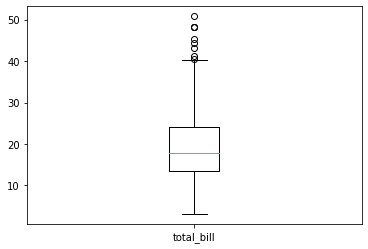

In [32]:
plt.boxplot(data=tips,x='total_bill',labels=['total_bill'])
plt.show()

<AxesSubplot:xlabel='total_bill'>

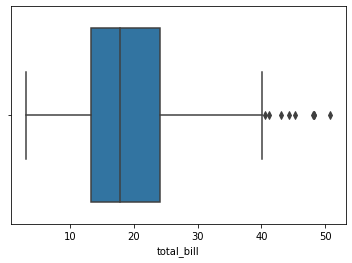

In [30]:
sns.boxplot(data=tips, x='total_bill', labels=['total_bill'])

<AxesSubplot:>

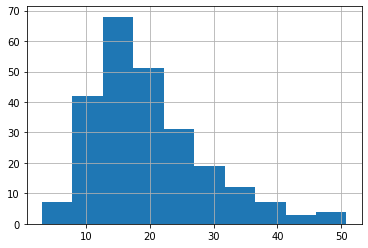

In [35]:
tips.total_bill.hist()

<AxesSubplot:xlabel='tip', ylabel='Count'>

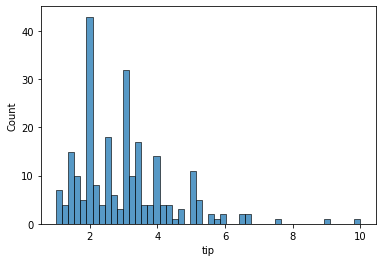

In [57]:
# x축을 bins=20 분리하여 나눈다 (y축 => count)
sns.histplot(data=tips, x='tip',bins=50)

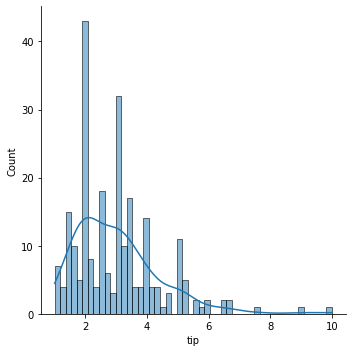

In [55]:
# y축 Density
sns.displot( x=tips['tip'], bins=50, kde=True)
# == sns.distplot(x=tips['tip'], bins=50)

<AxesSubplot:xlabel='tip', ylabel='Density'>

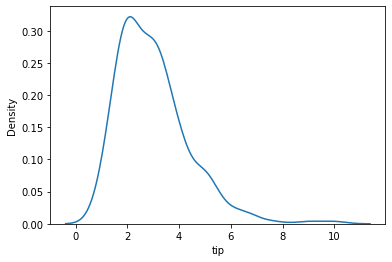

In [44]:
sns.kdeplot(data=tips, x= 'tip')

<AxesSubplot:xlabel='tip'>

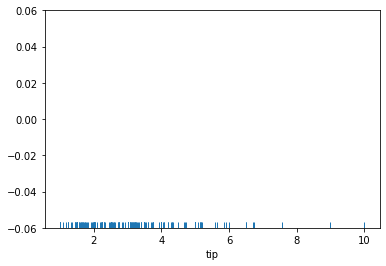

In [45]:
sns.rugplot(data=tips, x= 'tip')

---
## 데이터 재구조화 (Reshaping Data by **cross tabulations**)
* ### index / columns으로 도수분포표(frequency table) 만들기

In [61]:
pd.crosstab(index=tips['size'], columns='count')

col_0,count
size,
1,4
2,156
3,38
4,37
5,5
6,4


<AxesSubplot:xlabel='size'>

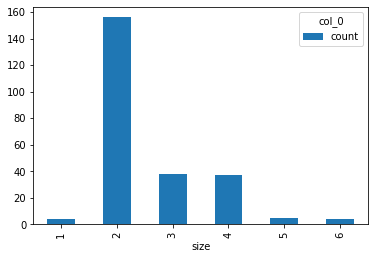

In [63]:
pd.crosstab(index=tips['size'], columns='count').plot.bar()

---
* ### 파생 변수 만들기 (tip_rate)  

In [70]:
tips['tip_rate']=tips["tip"] / tips["total_bill"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


---  
* ### tips.Profile_report에 관한 해석  

In [74]:
tips.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='size', ylabel='tip_rate'>

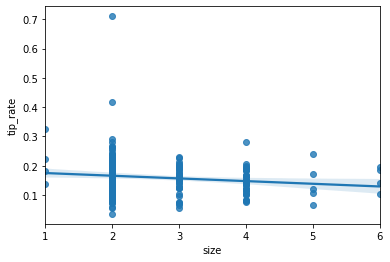

In [81]:
# size가 증가함에 따라 tip_rate는 감소하는 경향을 보인다.
sns.regplot(x=tips['size'], y=tips['tip_rate'],data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

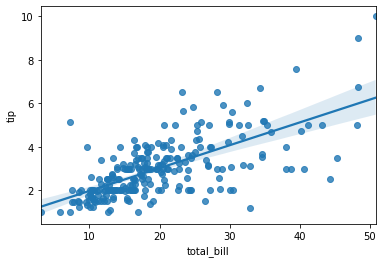

In [84]:
# total_bill이 증가함에 따라 tip의 가격도 증가하여 양의 상관관계를 갖는다.
sns.regplot(x=tips['total_bill'], y=tips['tip'],data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip_rate'>

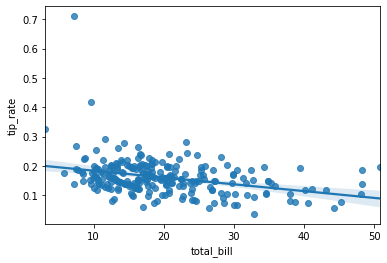

In [82]:
# total_bill이 증가대비 tip의 증가가 감소되기 때문에 음의 상관관계를 갖는다.
sns.regplot(x=tips['total_bill'], y=tips['tip_rate'],data=tips)

---  
* ### 범주형 데이터 encoing하기  

In [87]:
tips['sex'] = tips['sex'].replace({'Female':0,'Male':1})
tips['smoker'] = tips['smoker'].replace({'No':0,'Yes':1})
tips['day'] = tips['day'].replace({'Thur':0,'Fri':1,'Sat':2,'Sun':3})
tips['time'] = tips['time'].replace({'Lunch':0, 'Dinner':1})
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,0,0,3,1,2,0.059447
1,10.34,1.66,1,0,3,1,3,0.160542
2,21.01,3.50,1,0,3,1,3,0.166587
3,23.68,3.31,1,0,3,1,2,0.139780
4,24.59,3.61,0,0,3,1,4,0.146808


In [88]:
tips.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---  
## Seaborn exmaple  

In [1]:
import seaborn as sns
import pandas as pd

In [8]:
!cd

C:\Users\의원1\git\2021_Multicampus_DataScience


In [10]:
df = pd.read_csv('../2021-K-Digital-Training/python/pandas/tips.csv')

In [11]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

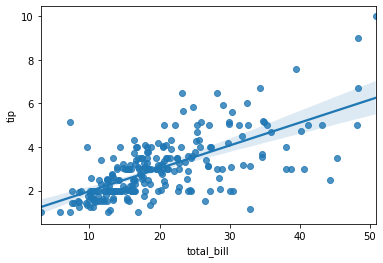

In [12]:
sns.regplot(x='total_bill', y="tip",data=df)

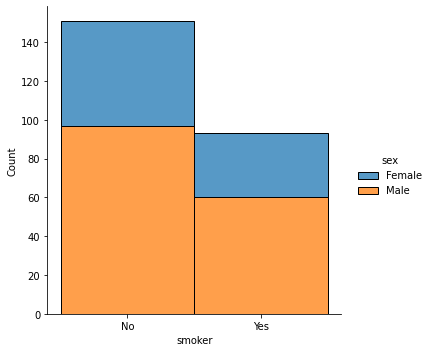

In [13]:
# hue => category
sns.displot(data = df, x = "smoker", hue="sex", multiple="stack")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

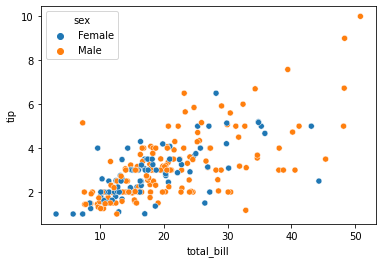

In [14]:
sns.scatterplot(data=df, x = 'total_bill', y= 'tip', hue='sex')

In [15]:
## Penguins Seaborn Dataset Visualization

penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [16]:
penguins.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

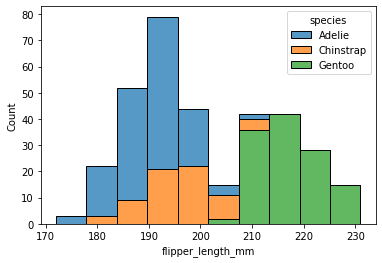

In [17]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

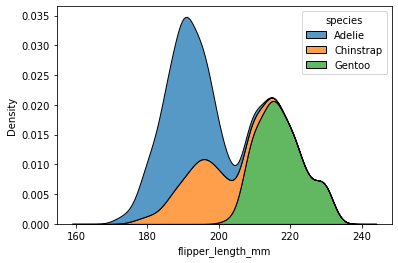

In [18]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

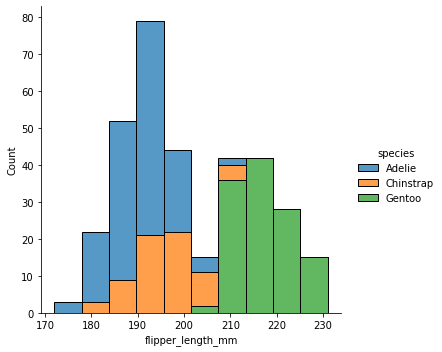

In [19]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

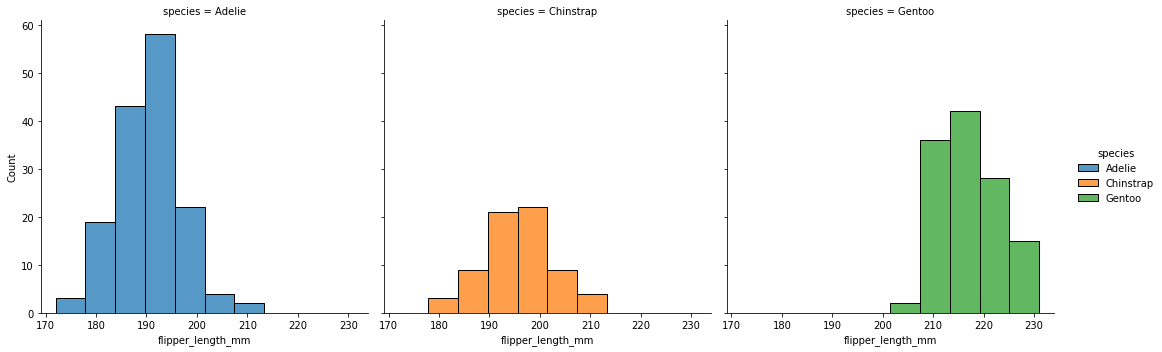

In [20]:
# columns들을 species로 구분
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

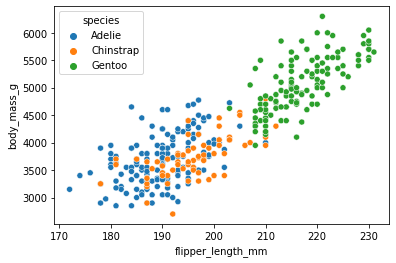

In [21]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species")